# Social Media Sentiment Analysis

### 1. Import necessary libraries

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the data

In [3]:
df = pd.read_csv(r"C:\Users\RIO\Desktop\twitter_data.csv")

### 3. Print the columns to identify the correct column name

In [4]:
print("Columns in the CSV file:", df.columns)

Columns in the CSV file: Index(['Unnamed: 0', 'id', 'tweet'], dtype='object')


In [5]:
column_name = 'tweet'  # Change this to the actual column name if it's different

### 5. Clean the data to handle missing or non-string values

In [6]:
df = df.dropna(subset=[column_name])  # Remove rows where the tweet column is NaN
df[column_name] = df[column_name].astype(str)  # Ensure all entries are strings

### 6. Preprocess and analyze sentiment

In [7]:
def preprocess_and_analyze(tweet):
    # Remove any unwanted characters, links, etc.
    tweet = tweet.lower()
    tweet = ' '.join(word for word in tweet.split() if not word.startswith('http'))
    tweet = ' '.join(word for word in tweet.split() if word.isalpha())
    return tweet, TextBlob(tweet).sentiment.polarity

### 7. Apply preprocessing and sentiment analysis

In [8]:
df['Cleaned_Tweet'], df['Polarity'] = zip(*df[column_name].apply(preprocess_and_analyze))

### 8. Classify the polarity into positive, negative, or neutral

In [9]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

### 9. Save the results to a new CSV file

In [11]:
df.to_csv('tweets_with_sentiment.csv', index=False)

### 10. Display the first few rows of the DataFrame

In [12]:
print(df.head())

   Unnamed: 0       id                                              tweet  \
1         0.0  31963.0           #studiolife #aislife #requires #passion…   
3         1.0  31964.0              something inside me dies õ¿ eyes nes…   
5         2.0  31965.0   @user #white #supremacists want everyone to s...   
7         3.0  31966.0     safe ways to heal your #acne!! #altwaystohe...   
9         4.0  31967.0  is the hp and the cursed child book up for res...   

                                Cleaned_Tweet  Polarity Sentiment  
1                                                   0.0   Neutral  
3               something inside me dies eyes       0.0   Neutral  
5                            want everyone to       0.0   Neutral  
7                      safe ways to heal your       0.5  Positive  
9  is the hp and the cursed child book up for       0.0   Neutral  


### 11. Count the number of each sentiment

In [13]:
sentiment_counts = df['Sentiment'].value_counts()

### 12. Plot the sentiment counts

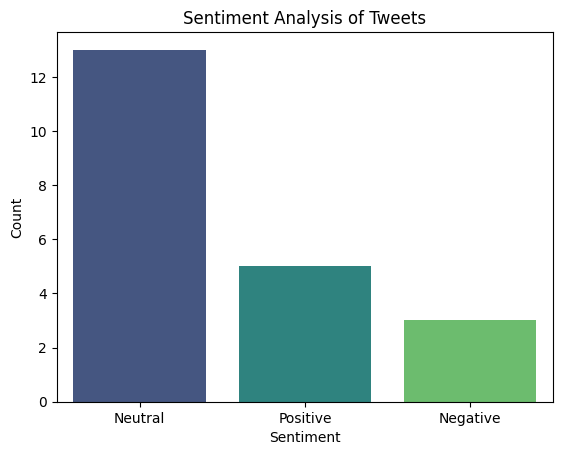

In [14]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()